# Метрики 
В ходе выполнения задачи по классификации новостей я выбрал использование взвешенных метрик, таких как взвешенная F1-score, взвешенная precision и взвешенная recall, в качестве основных критериев оценки производительности модели. Этот выбор обоснован наличием дисбаланса в распределении классов в наборе данных.

- Взвешенная F1-score: Эта метрика представляет собой гармоническое среднее между взвешенной precision и взвешенной recall. Она эффективно сбалансирована и учитывает как точность, так и полноту в контексте дисбаланса классов. В моем случае, где каждая категория новостей может иметь различное количество примеров, взвешенная F1-score позволяет учесть это неравенство и предоставляет обобщенную меру точности модели.
- Взвешенная Precision: Эта метрика измеряет точность классификации положительных примеров, причем учитывается дисбаланс в численности классов. Выбор взвешенной precision важен для обеспечения баланса между правильностью и минимизацией ложноположительных предсказаний, что имеет критическое значение в задаче классификации новостей.
- Взвешенная Recall: Эта метрика отражает способность модели обнаруживать все положительные примеры, учитывая дисбаланс в данных. Важность взвешенной recall возрастает при работе с классами различного размера, что характерно для задачи классификации новостей. Она дает понимание того, насколько эффективно модель выявляет все категории новостей.

# Шаги решения задачи
1. В решении задачи классификации новостей по категориям, я провел системный анализ, начиная с **Exploratory Data Analysis (EDA)** и **Feature Engineering**. Для улучшения обработки текста и повышения точности классификации был использован ряд методов. Вначале был проведен анализ словосочетаний с построением **Word Cloud** для каждой темы, что помогло расширить список стоп-слов.

2. Далее, для предобработки текста, я устранил пунктуацию, привел все слова к нижнему регистру и применил лемматизацию. Этот этап был важен для нормализации текста и уменьшения размерности признакового пространства.

3. В процессе экспериментов с различными методами векторизации текста и обучения моделей, я рассмотрел четыре основных подхода. Первый включал в себя векторизацию с использованием **tf-idf** и обучение моделей **SVM** и **Naive Bayes**. Однако, несмотря на хорошие результаты **SVM**, обнаружилось, что количество признаков превышает **2 миллиона**, что может стать проблемой для эффективного обучения и использования модели в практических задачах.

4. Далее был использован метод **word2vec** для векторизации текста, с последующим обучением моделей SVM, KNN и XGBoost. В этом случае, хотя уменьшилось количество признаков до 300, результаты классификации оказались несколько менее точными.

5. Также были использованы предобученные модели **word2vec** ['tayga_upos_skipgram_300_2_2019' - корпус Тайга, 'news_upos_skipgram_300_5_2019' - корпус, обученный на русскоязычных новостях](https://rusvectores.org/ru/models/). Однако результаты были не самые лучшие (ужасные). Все же удалось найти [модель fasttext от DeepPavlov](http://docs.deeppavlov.ai/en/master/features/pretrained_vectors.html#fasttext), предобученную на русской Википедии и сайте lenta.ru, которая показала результаты, близкие к результатам самостоятельно обученных моделей word2vec и td-idf. При этом стоит учесть, что время векторизации составило порядко **7 минут, что почти в 4 раза дольше**, чем методы векторизации, примененные ранее.

6. В конечном итоге, был выбран третий подход, включающий векторизацию через word2vec и **tf-idf**. Этот метод позволил создать вектора признаков, усредненные с учетом весов **tf-idf** для каждого слова. **Модели SVM, KNN и XGBoost** были обучены на таких векторах, и результаты оказались сопоставимыми с предыдущими экспериментами.

7. Наконец, для построения классификатора, выбран **word2vec+tf-idf**, усредненные с весами **tf-idf**, и модель **K-Nearest Neighbors (KNN)**. Этот выбор обоснован сбалансированным сочетанием точности и эффективности модели. Обученный классификатор теперь способен определять целевой класс для новых текстовых данных, предоставляя решение задачи классификации новостей по категориям с высокой точностью.

# Результаты

Выбранный подход позволяет построить классификатор с высокой точностью в задаче классификации новостей по категориям. Метрики, такие как взвешенная F1-score, взвешенная precision и взвешенная recall, обеспечивают справедливую и полную оценку производительности модели в условиях дисбаланса классов:

# Содержание
1. [EDA](#eda)
2. [Feature Engineering](#feature_engineering)
3. [tf-idf](#tf_idf)
   - [SVM](#tf_svm) 
   - [MultinomialNB](#tf_nb)
4. [word2vec](#wv)  
   - [SVM](#wv_svm) 
   - [KNN](#wv_knn)
   - [XGBoost](#wv_xgb) 
5. [fasttext](#ft)  
   - [SVM](#ft_svm) 
   - [KNN](#ft_knn)
   - [XGBoost](#ft_xgb) 
6. [word2vec & tf-idf](#wvidf)
   - [SVM](#wvidf_svm) 
   - [KNN](#wvidf_knn)
   - [XGBoost](#wvidf_xgb) 
7. [NewsClassifier](#news_clf)

# EDA <a id='eda'></a>

In [27]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Чтение данных из CSV файла в DataFrame


In [34]:
df = pd.read_csv('test.csv')

Вывод первых нескольких строк DataFrame для проверки данных


In [29]:
df.head()

,title,text,topic
0,Британцы отмечают двухлетие смерти Дианы,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир
1,Еще одно землетрясение в Турции: один человек ...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир
2,Российские национал-большевики убирают террито...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир
3,Киргизия ведет бои на границах с Таджикистаном...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир
4,Литва засудила участников переворота 91 года,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир


Вывод общей информации о DataFrame

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432158 entries, 0 to 432157
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   432158 non-null  object
 1   text    432158 non-null  object
 2   topic   432158 non-null  object
dtypes: object(3)
memory usage: 9.9+ MB


Подсчет пропущенных значений в каждом столбце


In [44]:
df.isna().sum()

title    0
text     0
topic    0
dtype: int64

Поиск и вывод всех дублирующихся строк в DataFrame


In [55]:
df[df.duplicated(keep=False)]

,title,text,topic
17709,Европейский союз составит досье на антиглобали...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир
18164,Европейский союз составит досье на антиглобали...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир
33723,В финале St Petersburg Open Южный проиграл Гро...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Спорт
33733,В финале St Petersburg Open Южный проиграл Гро...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Спорт
61916,В прокат выходит призер последнего Венецианско...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Культура
61963,В прокат выходит призер последнего Венецианско...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Культура
63561,"Российское издание диска Eminem ""Encore"" появи...","<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Культура
63769,"Российское издание диска Eminem ""Encore"" появи...","<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Культура
64131,Французский режиссер похитил президента Франци...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Культура
64151,Французский режиссер похитил президента Франци...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Культура


Удаление дубликатов в DataFrame

In [56]:
df.drop_duplicates(inplace=True)

# Вывод размера DataFrame после удаления дубликатов
df.shape

(432147, 3)

Посмотрим на столбец 'title' из DataFrame

In [47]:
df['title']

0                  Британцы отмечают двухлетие смерти Дианы
1         Еще одно землетрясение в Турции: один человек ...
2         Российские национал-большевики убирают террито...
3         Киргизия ведет бои на границах с Таджикистаном...
4              Литва засудила участников переворота 91 года
                                ...                        
432153    Россия предложила Китаю участвовать в судьбе р...
432154               Моуринью сравнил футболистов с мебелью
432155          Путин предостерег от запретов рэп-концертов
432156    «Желтые жилеты» прорвали кордон полиции под «М...
432157    Падение горнолыжника на полной скорости попало...
Name: title, Length: 432147, dtype: object

In [48]:
# Вывод описательной статистики для столбца 'title'
df['title'].describe()

count                                432147
unique                               430379
top       ЦБ отозвал лицензии у двух банков
freq                                     16
Name: title, dtype: object

Посмотрим на столбец 'text' из DataFrame

In [49]:
df['text']

0         <?xml version="1.0" encoding="utf-8"?>\n<conve...
1         <?xml version="1.0" encoding="utf-8"?>\n<conve...
2         <?xml version="1.0" encoding="utf-8"?>\n<conve...
3         <?xml version="1.0" encoding="utf-8"?>\n<conve...
4         <?xml version="1.0" encoding="utf-8"?>\n<conve...
                                ...                        
432153    <?xml version="1.0" encoding="utf-8"?>\n<conve...
432154    <?xml version="1.0" encoding="utf-8"?>\n<conve...
432155    <?xml version="1.0" encoding="utf-8"?>\n<conve...
432156    <?xml version="1.0" encoding="utf-8"?>\n<conve...
432157    <?xml version="1.0" encoding="utf-8"?>\n<conve...
Name: text, Length: 432147, dtype: object

Удалим xml формат со столбца 'text'

In [35]:
def del_xml(text):
    """Парсинг xml текста."""
    text = re.sub(r'[\x00-\x08\x0B-\x0C\x0E-\x1F]', '', text)

    # Разбор XML-текста
    root = ET.fromstring(text)

    # Извлечение текста из тега "person"
    return root.find('person').text if root.find('person') is not None else text
    
# Применяем функцию del_xml к столбцу 'text' в DataFrame df
df['text'] = df['text'].progress_apply(lambda text: del_xml(text))

100%|████████████████████████████████| 432158/432158 [00:11<00:00, 36910.67it/s]


In [36]:
df['text']

0         Британцы отмечают сегодня скорбную дату - втор...
1         подземный толчок силой 5,2 балла На северо-зап...
2         15 представителей национал-большевистской парт...
3         На юге Киргизии, а именно в Баткенском и Чон-А...
4         Россия крайне негативно оценивает судебный про...
                                ...                        
432153    Россия призвала Китай принять участие в перего...
432154    Главный тренер «Манчестер Юнайтед» Жозе Моурин...
432155    Президент России Владимир Путин, выступая на з...
432156    Протесты движения «желтых жилетов» в Париже сн...
432157    Швейцарский горнолыжник Марк Гизин неудачно пр...
Name: text, Length: 432158, dtype: object

Посомтрим на целевую переменную 'topic'

In [15]:
# Вывод относительных частот значений в столбце 'topic'
df['topic'].value_counts(normalize=True)

topic
Мир                0.316142
Экономика          0.184028
Спорт              0.149049
Культура           0.124474
Наука и техника    0.122956
Интернет и СМИ     0.103351
Name: proportion, dtype: float64

In [16]:
# Извлечение уникальных значений из столбца 'topic'
target_category = df['topic'].unique()
target_category

array(['Мир', 'Экономика', 'Интернет и СМИ', 'Спорт', 'Культура',
       'Наука и техника'], dtype=object)

In [37]:
# Создание нового столбца 'topic_id' с уникальными целочисленными идентификаторами для каждого значения в столбце 'topic'
df['topic_id'] = df['topic'].factorize()[0]
df.head()

,title,text,topic,topic_id
0,Британцы отмечают двухлетие смерти Дианы,Британцы отмечают сегодня скорбную дату - втор...,Мир,0
1,Еще одно землетрясение в Турции: один человек ...,"подземный толчок силой 5,2 балла На северо-зап...",Мир,0
2,Российские национал-большевики убирают террито...,15 представителей национал-большевистской парт...,Мир,0
3,Киргизия ведет бои на границах с Таджикистаном...,"На юге Киргизии, а именно в Баткенском и Чон-А...",Мир,0
4,Литва засудила участников переворота 91 года,Россия крайне негативно оценивает судебный про...,Мир,0


In [20]:
# Создание DataFrame 'category' с уникальными значениями из столбцов 'topic' и 'topic_id', отсортированными по 'topic_id'
category = df[['topic', 'topic_id']].drop_duplicates().sort_values('topic_id')
category

,topic,topic_id
0,Мир,0
227,Экономика,1
457,Интернет и СМИ,2
2081,Спорт,3
5061,Культура,4
52707,Наука и техника,5


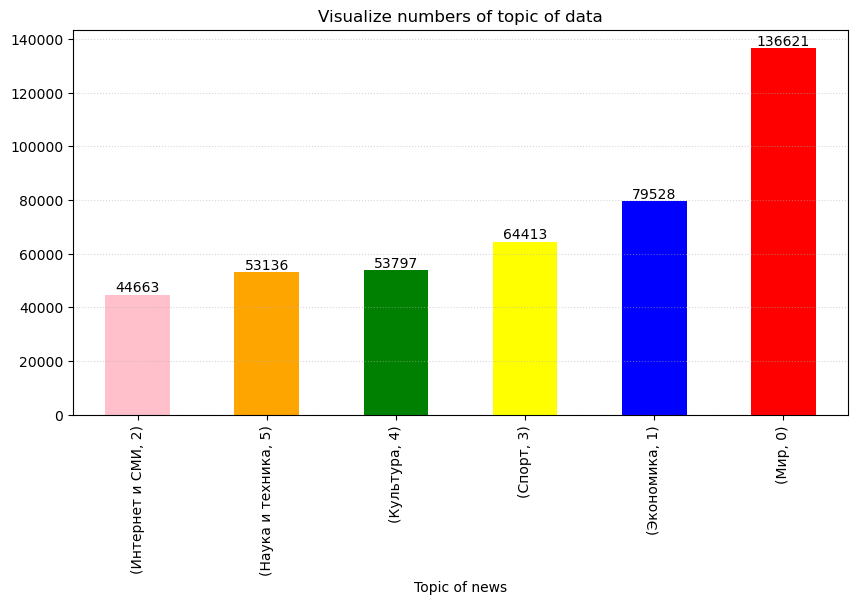

In [32]:
# Визуальное распределение целевой переменной topic
plt.figure(figsize=(10, 5))

# Группировка данных по столбцу 'topic' и подсчет частоты каждого 'topic_id'
ax = df.groupby('topic')['topic_id'].value_counts().sort_values().plot(kind="bar", 
                                                                       color=["pink", "orange", "green", "yellow", "blue", 'red'])

# Добавление меток с частотами над каждым столбцом
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge', fontsize=10, color='black')

# Настройка подписей осей и заголовка
plt.xlabel("Topic of news")
plt.title("Visualize numbers of topic of data")
plt.grid(True, ls=':', alpha=0.5, axis='y')


Посмотрим на облака слов для каждой темы с помощью библиотеки WordCloud

In [39]:
df.isna().sum()

title       0
text        2
topic       0
topic_id    0
dtype: int64

[nltk_data] Downloading package stopwords to /Users/bulat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


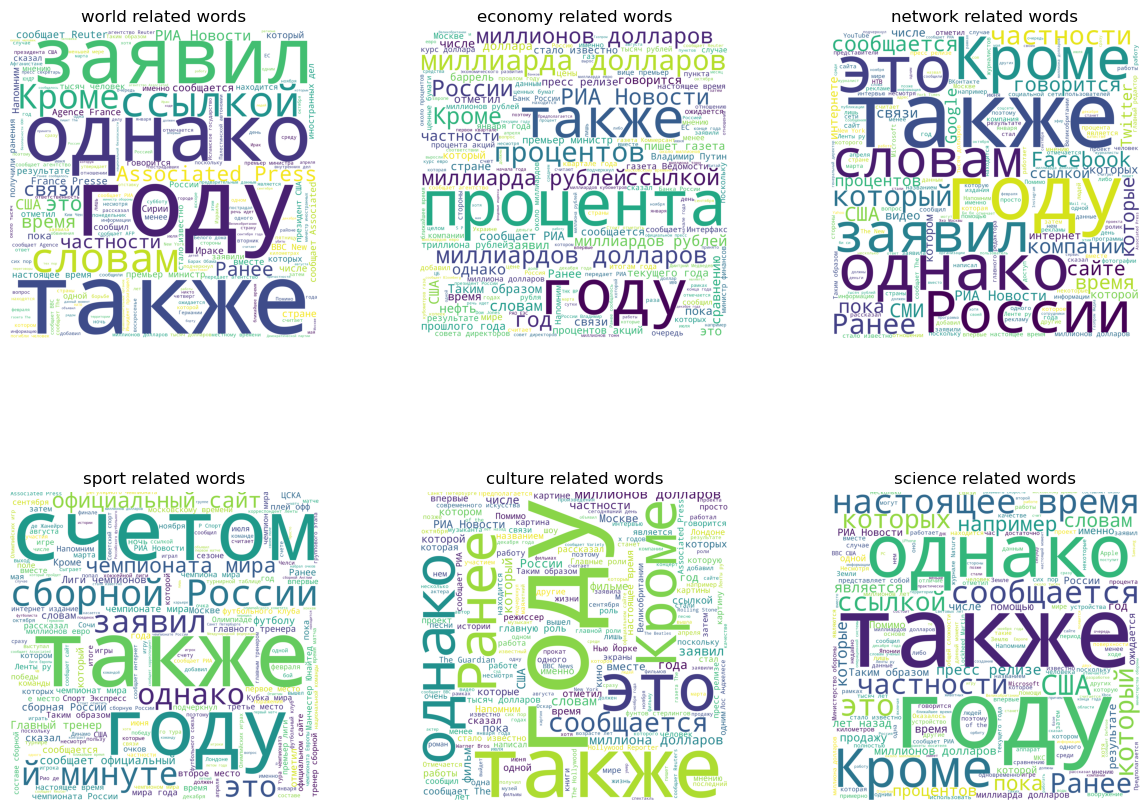

In [40]:
import nltk
from wordcloud import WordCloud

# Загружаем стоп-слова для библиотеки nltk
nltk.download('stopwords')

# Установка стоп-слов для русского языка
stop = set(stopwords.words('russian'))

# Словарь тем
topics = {
    0: 'world',
    1: 'economy',
    2: 'network',
    3: 'sport',
    4: 'culture',
    5: 'science'
}

def get_topic_words(topic_id):
    """Получение слов, связанных с определенной темой."""
    return df[df['topic_id'] == topic_id]['text'].dropna()

def wordcloud_draw(dataset, ax, color='white'):
    """Функция для отрисовки облака слов."""
    words = ' '.join(dataset)
    cleaned_word = ' '.join([word for word in words.split() if word not in ['news', 'text']])
    wordcloud = WordCloud(stopwords=stop, background_color=color, width=2500, height=2500).generate(cleaned_word)
    ax.imshow(wordcloud)
    ax.axis("off")

# Создание сетки subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# Генерация word cloud для каждой темы
for i, (topic_id, topic_name) in enumerate(topics.items()):
    row = i // 3
    col = i % 3
    axs[row, col].set_title(f"{topic_name} related words")
    wordcloud_draw(get_topic_words(topic_id), axs[row, col], 'white')

# Feature Engineering <a id='feature_engineering'></a>

In [41]:
from nltk.corpus import stopwords
from stop_words import get_stop_words
from collections import defaultdict
from pymystem3 import Mystem  # Подгружаем Mystem из библиотеки pymystem3
from functools import lru_cache
from tqdm import tqdm  # Импортируем tqdm для отслеживания прогресса
import xml.etree.ElementTree as ET
import re

# Инициализация Mystem для лемматизации текста
mystem = Mystem()

# Декоратор lru_cache используется для кэширования результатов вызова функции
from functools import lru_cache
# Инициализация tqdm для отслеживания прогресса выполнения операций
tqdm.pandas()

# Получение стоп-слов для английского и русского языков
en_stop_words = set(get_stop_words('en')) | set(stopwords.words('english'))
ru_stop_words = set(get_stop_words('ru')) | set(stopwords.words('russian'))

# Общий набор стоп-слов
COMMON_STOP_WORDS = {'также', 'новость', 'новости', 'однако',
                    'это', 'кроме', 'который', 'которая', 'которые',
                    'которое', 'котором', 'которых', 'кроме',
                    'году', 'год', 'годом', 'года', 'лента',
                    'риа', 'тасс', 'редакция', 'газета', 'интерфакс',
                    'village', 'reuters', 'уточняться', 'частности', 
                    'сообщать', 'сообщается', 'сообщает', 'заявил',
                    'заявить', 'оффициальный', 'заявлять',  'оффициально',
                    'таким', 'образ', 'образом', 'данный', 'ранее', 'уточняться'}

# Общий набор стоп-слов для всех языков
STOP_WORDS = en_stop_words | ru_stop_words | COMMON_STOP_WORDS

def del_xml(text):
    """Парсинг xml текста."""
    text = re.sub(r'[\x00-\x08\x0B-\x0C\x0E-\x1F]', '', text)

    # Разбор XML-текста
    root = ET.fromstring(text)

    # Извлечение текста из тега "person"
    return root.find('person').text if root.find('person') is not None else text

def get_lower(text):
    """Преобразование текста в нижний регистр."""
    return str(text).lower()

def remove_punctuation(text):
    """Удаление неалфавитных символов с сохранением дефисов и апострофов."""
    return ''.join([c if c.isalpha() or c in ['-', "'"] else ' ' for c in text])

@lru_cache(maxsize=None)
def get_word_normal_form(word):
    """Получение нормальной формы слова с использованием Mystem."""
    return ''.join(mystem.lemmatize(word)).strip().replace('ё', 'е').strip('-')
    
def lemmatize_words(text):
    """Лемматизация слов в заданном тексте и фильтрация стоп-слов."""
    return ' '.join([get_word_normal_form(word) for word in text.split() if len(get_word_normal_form(word)) > 2 and get_word_normal_form(word) not in STOP_WORDS])


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

TEXT_PIPELINE = Pipeline([
    ('delete_xml', FunctionTransformer(func=lambda x: x.progress_apply(del_xml), validate=False)),
    ('lowercase', FunctionTransformer(func=lambda x: x.progress_apply(get_lower), validate=False)),
    ('remove_punctuation', FunctionTransformer(func=lambda x: x.progress_apply(remove_punctuation), validate=False)),
    ('lemmatize', FunctionTransformer(func=lambda x: x.progress_apply(lemmatize_words), validate=False)),
])

In [45]:
%%time
df['text'] = TEXT_PIPELINE.fit_transform(df['text'])

100%|█████████████████████████████████| 432158/432158 [01:10<00:00, 6108.81it/s]


CPU times: user 58.9 s, sys: 7.21 s, total: 1min 6s
Wall time: 1min 44s


In [46]:
TITLE_PIPELINE = Pipeline([
    ('lowercase', FunctionTransformer(func=lambda x: x.progress_apply(get_lower), validate=False)),
    ('remove_punctuation', FunctionTransformer(func=lambda x: x.progress_apply(remove_punctuation), validate=False)),
    ('lemmatize', FunctionTransformer(func=lambda x: x.progress_apply(lemmatize_words), validate=False)),
])

In [47]:
%%time
# Применение пайплайна обработки текста к столбцу 'text'
df['title'] = TITLE_PIPELINE.fit_transform(df['title'])

100%|███████████████████████████████| 432158/432158 [00:02<00:00, 190862.62it/s]

CPU times: user 3.1 s, sys: 315 ms, total: 3.42 s
Wall time: 4.59 s


In [132]:
df.head()

,title,text,topic
0,британец отмечать двухлетие смерть диана,британец отмечать скорбный дата вторуюгодовщин...,Мир
1,землетрясение турция погибать ранить,подземный толчок сила балл северо-запад турция...,Мир
2,российский национал-большевик убирать территор...,представитель национал-большевистский партия р...,Мир
3,киргизия вести бой граница таджикистан узбекистан,киргизия баткенский чон-алайскомрайон ошский о...,Мир
4,литва засуживать участник переворот,россия крайне негативно оценивать судебный про...,Мир


In [48]:
# Создаем словарь, используя defaultdict, чтобы избежать ошибок, если ключ отсутствует
vocabulary = defaultdict(int)

# Итерируемся по каждой строке (новости) в DataFrame df
for news in tqdm(df.itertuples()):
    # Разбиваем текст новости на слова и итерируемся по каждому слову
    for word in news.text.split():
        # Увеличиваем счетчик слова в словаре
        vocabulary[word] += 1

# Выводим количество уникальных слов в датасете
print('Unique words in dataset:', len(vocabulary))

432158it [00:10, 39657.84it/s]

Unique words in dataset: 480596


In [49]:
# Посмотрим на количество слов, встречающихся более 3 раз.

n_min_occurrence = 3  # Минимальное количество появлений слова, чтобы оно было учтено
# Фильтруем словарь по минимальному количеству появлений
filtered_vocab = list(filter(lambda x: x[1] >= n_min_occurrence, vocabulary.items()))

# Выводим количество слов, которые встречаются больше или равно n_min_occurrence раз
print('Количество слов, встреченных более %d раз: %d' %
      (n_min_occurrence, len(filtered_vocab)))

Количество слов, встреченных более 3 раз: 195941


In [50]:
# Top k самые частые слова вместе с их частотами.

top_k = 20  # Количество слов, которые будут выведены в топе
print('Топ %d наиболее частых слов:' % top_k)

# Сортировка словаря по убыванию частоты и выбор top_k
sorted_vocab = sorted(vocabulary.items(), key=lambda x: -x[1])[:top_k]

# Вывод топовых слов и их частоты
for i, (word, freq) in enumerate(sorted_vocab):
    print(i+1, word, freq)


Топ 20 наиболее частых слов:
1 россия 245592
2 свой 238863
3 компания 215668
4 процент 195508
5 становиться 189416
6 доллар 178650
7 страна 176484
8 сша 176017
9 российский 165153
10 получать 141180
11 слово 138331
12 миллион 138279
13 отмечать 126171
14 президент 123561
15 новый 121069
16 тысяча 119012
17 миллиард 109650
18 американский 108470
19 составлять 105580
20 являться 103905


In [42]:
df.head()

,title,text,topic,topic_id
0,британец отмечать двухлетие смерть диана,британец отмечать скорбный дата вторуюгодовщин...,Мир,0
1,землетрясение турция погибать ранить,подземный толчок сила балл северо-запад турция...,Мир,0
2,российский национал-большевик убирать территор...,представитель национал-большевистский партия р...,Мир,0
3,киргизия вести бой граница таджикистан узбекистан,киргизия баткенский чон-алайскомрайон ошский о...,Мир,0
4,литва засуживать участник переворот,россия крайне негативно оценивать судебный про...,Мир,0


In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [52]:
# Используем LabelEncoder от scikit-learn для кодирования столбца "topic".

le = LabelEncoder()
df['topic_id'] = le.fit_transform(df['topic'])

In [53]:
# Создание целевой пременной, объедняя столбцы 'title' и 'text'
X = pd.DataFrame(df['title'] + ' ' + df['text'], columns=['text'])

# Присвоение столбца 'topic_id' целевой переменной y
y = df['topic_id']

In [54]:
X.head()

,text
0,британец отмечать двухлетие смерть диана брита...
1,землетрясение турция погибать ранить подземный...
2,российский национал-большевик убирать территор...
3,киргизия вести бой граница таджикистан узбекис...
4,литва засуживать участник переворот россия кра...


In [55]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# tf-idf <a id='tf_idf'></a>

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support 

In [57]:
%%time
# Создание и обучение TF-IDF векторизатора

# min_df=3 указывает, что слово должно встречаться в минимуме 3 документах для учета
# ngram_range=(1,2) указывает на униграммы и биграммы
# lowercase=False гарантирует чувствительность к регистру

tfidf_vectorizer = TfidfVectorizer(min_df=3, ngram_range=(1,2), lowercase=False).fit(X_train['text'])

# Вывод размера словаря после TF-IDF векторизации
print(len(tfidf_vectorizer.vocabulary_))

2050113
CPU times: user 55.5 s, sys: 16.4 s, total: 1min 11s
Wall time: 1min 19s


In [58]:
%%time
# Преобразование текстов из обучающего набора в TF-IDF матрицу
X_train_tf = tfidf_vectorizer.transform(X_train['text'])

# Преобразование текстов из тестового набора в TF-IDF матрицу
X_test_tf = tfidf_vectorizer.transform(X_test['text'])

CPU times: user 1min 1s, sys: 4.61 s, total: 1min 6s
Wall time: 1min 7s


In [22]:
X_train_tf.shape

(302510, 2050113)

### SVM <a id='tf_svm'></a>

In [60]:
def evaluate_model(model, x_train, x_test, y_train=y_train, y_test=y_test):
    """
    Обучение модели model на тренировочном наборе x_train
    Оценка производительности модели на тестовом наборе x_test.
    """
    
    # Обучение модели на обучающих данных
    model.fit(x_train, y_train)
    
    # Предсказание меток для тестового набора
    y_pred = model.predict(x_test)
    
    # Вывод метрик производительности
    print('Weighted Precision:', precision_score(y_test, y_pred, average='weighted'))
    print('Weighted Recall:', recall_score(y_test, y_pred, average='weighted'))
    print('Weighted F1 score:', f1_score(y_test, y_pred, average='weighted'))


    return y_pred


In [61]:
from sklearn.linear_model import SGDClassifier

In [63]:
%%time
# Создание модели SVM с использованием SGDClassifier
svm_model = SGDClassifier(loss='hinge', max_iter=70, random_state=42, alpha=1e-5)

# Оценка производительности модели
svm_pred = evaluate_model(svm_model, X_train_tf, X_test_tf)

Weighted Precision: 0.9416101922008477
Weighted Recall: 0.9419427989633469
Weighted F1 score: 0.9416878833617215
CPU times: user 19.3 s, sys: 3.64 s, total: 22.9 s
Wall time: 12.7 s


In [64]:
def print_top_K(vectorizer, model, model_coefs, class_labels, k=10):
    """
    Функция для вывода слов с наивысшими значениями коэффициентов для каждого класса.
    """
    
    feature_names = vectorizer.get_feature_names_out()
    top_words = {}

    # Итерация по классам
    for i, class_label in tqdm(enumerate(class_labels), desc="Processing Classes", total=len(class_labels)):
        # Получение индексов топовых K признаков для текущего класса
        top_K_indices = np.argsort(model_coefs[i])[-k:]
        # Получение самих признаков
        top_words[class_label] = [feature_names[j] for j in top_K_indices]

    # Возвращение результата в виде DataFrame
    return pd.DataFrame(top_words)

In [77]:
# Вывод слов с наивысшими значениями коэффициентов для каждого класса модели SVM
print_top_K(tfidf_vectorizer, svm_model, svm_model.coef_, le.classes_, k=20)

Processing Classes: 100%|████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  8.13it/s]


,Интернет и СМИ,Культура,Мир,Наука и техника,Спорт,Экономика
0,домен,евровидение,мид,apple,игрок,предприятие
1,главный редактор,культура,ирак,xbox,соревнование,рубль
2,нтв,роман,погибший,разработчик,футбольный,вто
3,редактор,музей,пожар,истребитель,теннисистка,торговый
4,юзер,кино,немецкий,мкс,теннисист,центробанк
5,медиа,театр,spiegel,шутер,федерация,юкос
6,ролик,искусство,погибать,ран,команда,банка
7,журналистка,актриса,среда,исследователь,турнир,минфин
8,сми,концерт,нато,аппарат,спорт,бизнес
9,онлайновый,альбом,суббота,мобильник,клуб,аэрофлот


### MultinomialNB <a id='tf_nb'></a>

In [65]:
from sklearn.naive_bayes import MultinomialNB

In [67]:
%%time
# Создание модели мультиномиального наивного Байеса с использованием MultinomialNB
nb_model = MultinomialNB(alpha=0.1, fit_prior=False, class_prior=[0.316142, 0.184028, 0.149049, 0.124474, 0.122956, 0.103351])

# Оценка производительности модели
nb_pred = evaluate_model(nb_model, X_train_tf, X_test_tf)

Weighted Precision: 0.9277884902120166
Weighted Recall: 0.9267169566827101
Weighted F1 score: 0.9270558119190998
CPU times: user 1.17 s, sys: 122 ms, total: 1.3 s
Wall time: 1.39 s


In [68]:
# Вывод слов с наивысшими значениями коэффициентов для каждого класса модели NB
print_top_K(tfidf_vectorizer, nb_model, nb_model.feature_log_prob_, le.classes_, k=20)

Processing Classes: 100%|█████████████████████████| 6/6 [00:00<00:00,  8.86it/s]


,Интернет и СМИ,Культура,Мир,Наука и техника,Спорт,Экономика
0,рекламный,хороший,взрыв,получать,чемпионат мир,газ
1,издание,работа,израильский,спутник,кубок,миллиард рубль
2,ролик,книга,результат,исследователь,игрок,газпром
3,информация,свой,находиться,работа,российский,рост
4,программа,фестиваль,представитель,apple,лига,страна
5,миллион,концерт,происходить,истребитель,победа,миллион
6,россия,музыкант,израиль,сша,футболист,рынок
7,facebook,становиться,самолет,корабль,сборная россия,составлять
8,телеканал,песня,министр,исследование,чемпион,миллиард доллар
9,сервис,миллион,американский,проект,мир,российский


In [69]:
def plot_metrics_per_class(y_test, y_pred, classes, ax):
    '''
    Функции для визуализации матрицы ошибок (confusion matrix) и метрик классификации для каждого класса
    '''  

    # Вычисление матрицы ошибок и нормализация по строкам
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = cm / cm.sum(axis=1)[:, np.newaxis]

    # Вычисление метрик для каждого класса
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

    # Создание позиций для баров
    positions = np.arange(len(classes))

    # Визуализация метрик для каждого класса в виде группированных баров
    height = 0.2  # Высота бара
    ax.barh(positions - height, precision, height, label='Precision')
    ax.barh(positions, recall, height, label='Recall')
    ax.barh(positions + height, f1, height, label='F1-score')

    # Установка меток и легенды
    ax.set_yticks(positions)
    ax.set_yticklabels(classes)
    ax.legend(loc=(1,1))
    ax.set_xticks(np.arange(0, 1.1, 0.1))
    ax.set_xlabel('Scores')
    ax.set_ylabel('Classes')
    ax.xaxis.grid(visible=True, ls=':')

def plot_results(y_preds):
    '''
    Функция для визуализации результатов моделей
    '''
    
    # Создание сетки для размещения графиков
    fig, ax = plt.subplots(len(y_preds), 2, figsize=(15, 7 * len(y_preds)))
    gs = plt.GridSpec(len(y_preds), 2, width_ratios=[1, 1.5])

    # Итерация по моделям и отображение матрицы ошибок и точности по классам
    for i, model in enumerate(y_preds.keys()):
        # Отображение матрицы ошибок
        ConfusionMatrixDisplay.from_predictions(y_test, y_preds[model], normalize='true', 
                                                values_format='.2f', cmap='Blues',
                                                display_labels=list(le.classes_), ax=ax[i, 0])
        ax[i, 0].set_title(model + ' confusion matrix')
        ax[i, 0].tick_params(axis='x', labelrotation=90)

        # Отображение точности по классам
        plot_metrics_per_class(y_test=y_test, y_pred=y_preds[model], classes=le.classes_, ax=ax[i, 1])
        ax[i, 1].set_title(model + ' metics per class')

    # Регулировка макета
    plt.tight_layout()


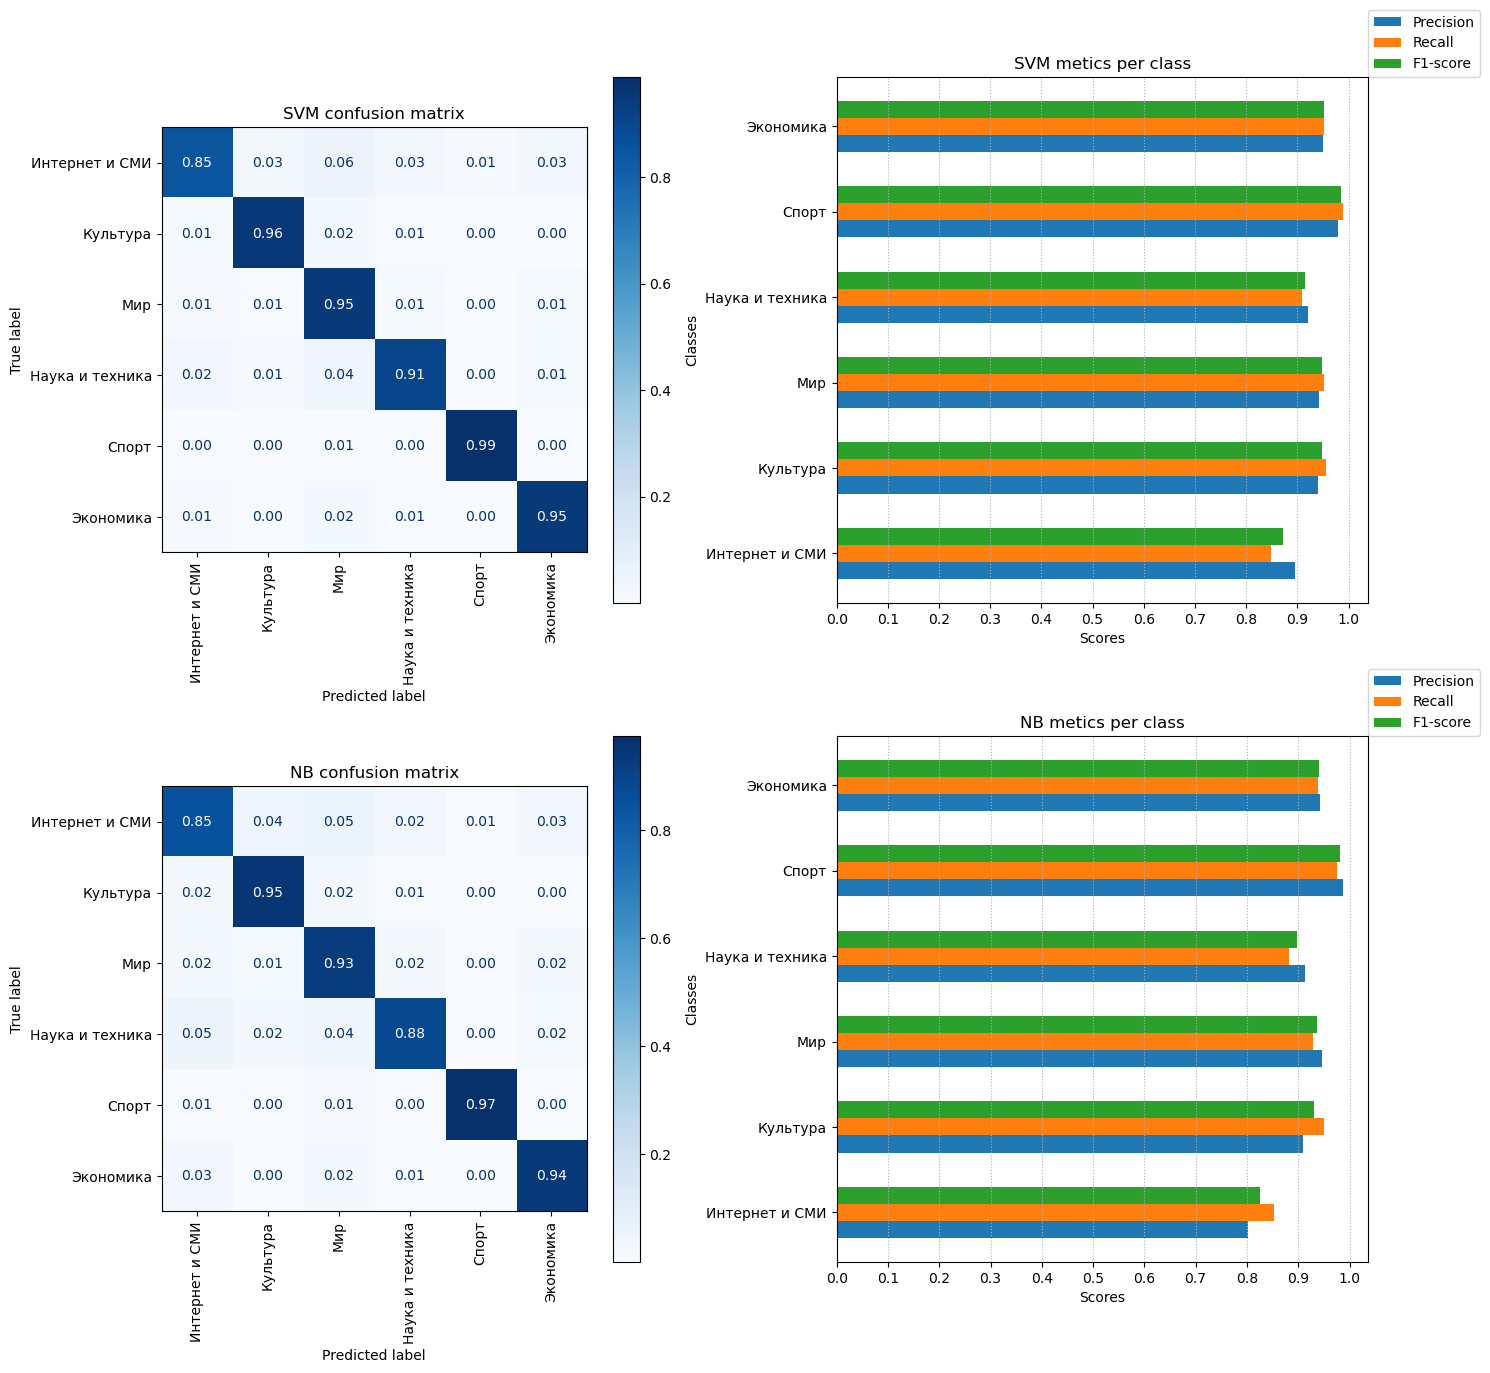

In [70]:
# Визуализация результатов моделей
y_preds = {'SVM': svm_pred, 'NB': nb_pred}
plot_results(y_preds)

# word2vec <a id='wv'></a>

In [23]:
from gensim.models import Word2Vec
import logging

# Настройка журнала для отображения информации об обучении Word2Vec
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Обучение word2ve вручную <a id='wv1'></a>

In [30]:
# Параметры для создания модели Word2Vec

min_count = 3   # Минимальное количество вхождений слова для учета в обучении модели
vec_size = 300  # Размерность векторного представления каждого слова
window = 5      # Максимальное расстояние между текущим и предсказанным словом в предложении

In [31]:
%%time

# Обучение модели Word2Vec
w2v = Word2Vec(sentences=[text.split() for text in X_train['text']],  # Список токенизированных предложений
               min_count=3,        # Минимальное количество вхождений слова для учета
               vector_size=300,    # Размерность векторного представления каждого слова
               window=3,           # Максимальное расстояние между текущим и предсказанным словом в предложении
               hs=1,               # Использование иерархического сэмплирования (hierarchical softmax)
               sg=0,               # Использование CBOW (Continuous Bag of Words) вместо Skip-gram
               negative=0,         # Количество "шумных" слов для отрицательной выборки
               workers=8,          # Количество ядер процессора, используемых для обучения параллельно
               epochs=8            # Количество проходов по корпусу данных (эпох обучения)
)

2024-03-07 20:57:17,484 : INFO : collecting all words and their counts
2024-03-07 20:57:17,494 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-03-07 20:57:19,076 : INFO : PROGRESS: at sentence #10000, processed 1212199 words, keeping 64619 word types
2024-03-07 20:57:19,838 : INFO : PROGRESS: at sentence #20000, processed 2419418 words, keeping 93451 word types
2024-03-07 20:57:20,337 : INFO : PROGRESS: at sentence #30000, processed 3622079 words, keeping 115643 word types
2024-03-07 20:57:21,076 : INFO : PROGRESS: at sentence #40000, processed 4828073 words, keeping 135349 word types
2024-03-07 20:57:21,623 : INFO : PROGRESS: at sentence #50000, processed 6038182 words, keeping 152692 word types
2024-03-07 20:57:22,120 : INFO : PROGRESS: at sentence #60000, processed 7231369 words, keeping 168410 word types
2024-03-07 20:57:22,551 : INFO : PROGRESS: at sentence #70000, processed 8439133 words, keeping 183285 word types
2024-03-07 20:57:23,060 : INFO : P

CPU times: user 29min 17s, sys: 1min 37s, total: 30min 55s
Wall time: 8min 32s


In [32]:
# Сохранение модели word2vec в файл w2v.pickle

import pickle
with open('w2v.pickle', 'wb') as f:
    pickle.dump(w2v, f, pickle.HIGHEST_PROTOCOL)

word_vectors = w2v.wv

In [57]:
%%time
def get_vectorized_text(X, word_vectors=word_vectors):
    '''
    Функция для получения векторизованного текста
    '''
    # Инициализация матрицы для хранения векторизованных данных
    vectorized_news = np.zeros((X.shape[0], word_vectors.vector_size), dtype="float32")
    
    # Итерация по всем новостям с отображением прогресса
    for i in tqdm(range(X.shape[0])):
        words = X.text.iloc[i].split()
        
        valid_words = [word for word in words if word in word_vectors]
        
        if valid_words:
            vectors = np.vstack([word_vectors[word] for word in valid_words])
            vectorized_text = np.mean(vectors, axis=0)
        else:
            vectorized_text = np.zeros(word_vectors.vector_size)        
        
        vectorized_news[i, :] = vectorized_text

    return vectorized_news


X_train_w2v = pd.DataFrame(get_vectorized_text(X_train, word_vectors))
X_test_w2v = pd.DataFrame(get_vectorized_text(X_test, word_vectors))

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 129648/129648 [00:33<00:00, 3907.44it/s]


### SVM <a id='wv_svm'></a>

In [58]:
%%time
smv_pred = evaluate_model(svm_model, x_train=X_train_w2v, x_test=X_test_w2v)

Weighted Precision: 0.9237626647244366
Weighted Recall: 0.9241407503393805
Weighted F1 score: 0.9238445347795623
CPU times: user 10.9 s, sys: 382 ms, total: 11.3 s
Wall time: 11 s


### KNN <a id='wv_knn'></a>

In [166]:
from sklearn.neighbors import KNeighborsClassifier

In [167]:
knn_model = KNeighborsClassifier(n_neighbors=7, n_jobs=8)

In [168]:
%%time
knn_pred = evaluate_model(knn_model, x_train=X_train_w2v, x_test=X_test_w2v)

Weighted Precision: 0.9306152425143753
Weighted Recall: 0.9307724941185546
Weighted F1 score: 0.9306265907006435
CPU times: user 24min 2s, sys: 9.16 s, total: 24min 12s
Wall time: 3min 45s


### XGBoost <a id='wv_xgb'></a>

In [169]:
import xgboost as xgb

In [170]:
%%time
xgb_model = xgb.XGBClassifier(objective='multi:softmax',eval_metric='mlogloss', verbosity=2,
                              num_class=6, max_depth=7, subsample=0.5, learning_rate=0.1,
                              n_estimators=125)
xgb_pred = evaluate_model(xgb_model, x_train=X_train_w2v, x_test=X_test_w2v)


Weighted Precision: 0.9230773508824107
Weighted Recall: 0.9234293648038875
Weighted F1 score: 0.9231322190394851
CPU times: user 13min 20s, sys: 1min 12s, total: 14min 33s
Wall time: 2min 15s


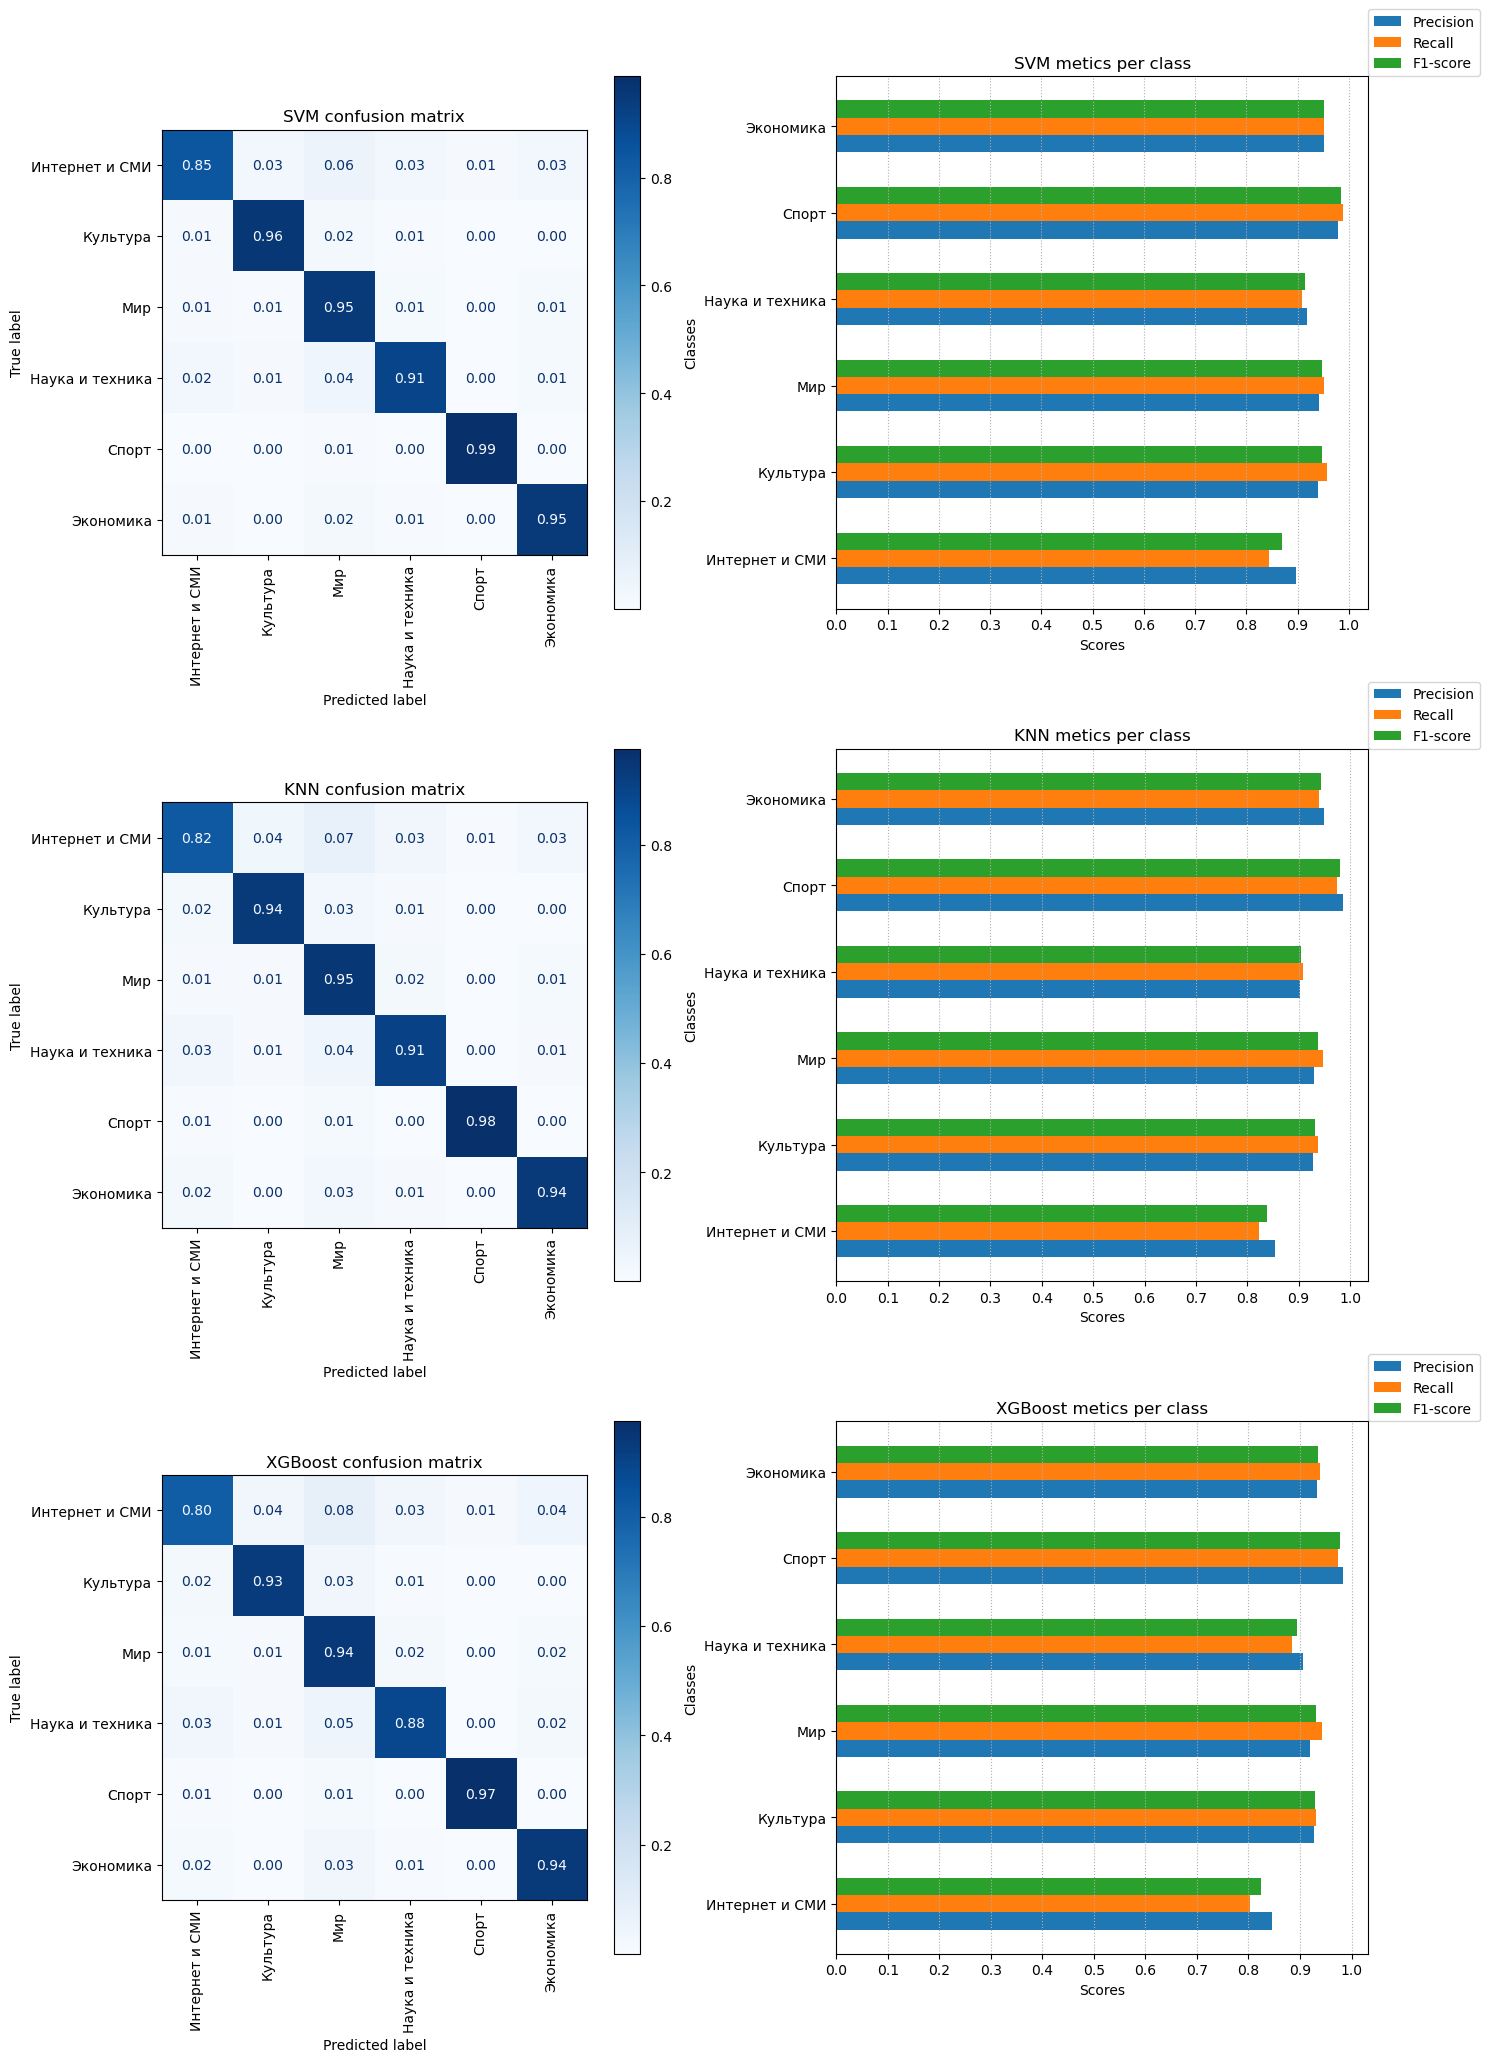

In [171]:
y_preds = {'SVM':svm_pred,
           'KNN':knn_pred,
           'XGBoost': xgb_pred}

plot_results(y_preds)

# Fasttext <a id='ft'></a>

In [20]:
# Загрузка модели, предобученной модели для русских слов.
# Несколько моделей были обучены в объединенной русской Википедии и Lenta.ru corpora. 

from gensim.models import FastText

fasttext_path = 'ft_native_300_ru_wiki_lenta_lemmatize.bin'
pretrained_fasttext = FastText.load_fasttext_format(fasttext_path)


/var/folders/3n/r94r6vrx6s1d2yhxrlf52rhc0000gn/T/ipykernel_42475/3808420843.py:7: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  pretrained_fasttext = FastText.load_fasttext_format(fasttext_path)


In [41]:
%%time
# Применяем функцию векторизации к столбцу 'text' в X_train, создавая новый столбец 'vectorized_text'
X_train['fasttext_vectorized_text'] = X_train['text'].apply(lambda x: get_vectorized_text(x, pretrained_fasttext.wv))

# Применяем функцию векторизации к столбцу 'text' в X_test, создавая новый столбец 'vectorized_text'
X_test['fasttext_vectorized_text'] = X_test['text'].apply(lambda x: get_vectorized_text(x, pretrained_fasttext.wv))

CPU times: user 2min 6s, sys: 1min 6s, total: 3min 13s
Wall time: 7min 34s


In [58]:
# Преобразование столбца 'vectorized_text' в матрицу признаков для обучающего набора
X_train_fasttext = np.vstack(X_train['fasttext_vectorized_text'].to_numpy())

# Преобразование столбца 'vectorized_text' в матрицу признаков для тестового набора
X_test_fasttext = np.vstack(X_test['fasttext_vectorized_text'].to_numpy())

### SVM <a id='ft_svm'></a>

In [73]:
%%time
svm_pred = evaluate_model(svm_model, x_train=X_train_fasttext, x_test=X_test_fasttext)

Weighted Precision: 0.9246889433220777
Weighted Recall: 0.924973775145008
Weighted F1 score: 0.9247198573131209
CPU times: user 9.78 s, sys: 162 ms, total: 9.94 s
Wall time: 8.79 s


### KNN <a id='ft_knn'></a>

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn_model = KNeighborsClassifier(n_neighbors=7, n_jobs=8)

In [62]:
%%time
knn_pred = evaluate_model(knn_model, x_train=X_train_fasttext, x_test=X_test_fasttext)

Weighted Precision: 0.9323230012199597
Weighted Recall: 0.9325249907441688
Weighted F1 score: 0.932383383415407
CPU times: user 20min 4s, sys: 3.9 s, total: 20min 8s
Wall time: 2min 42s


### XGBoost <a id='ft_xgb'></a>

In [64]:
import xgboost as xgb

In [65]:
%%time
xgb_model = xgb.XGBClassifier(objective='multi:softmax',eval_metric='mlogloss', verbosity=2,
                              num_class=6, max_depth=7, subsample=0.5, learning_rate=0.1,
                              n_estimators=125)
xgb_pred = evaluate_model(xgb_model, x_train=X_train_fasttext, x_test=X_test_fasttext)


Weighted Precision: 0.9268002232848308
Weighted Recall: 0.927179748241392
Weighted F1 score: 0.9269122031657053
CPU times: user 11min 6s, sys: 56.3 s, total: 12min 2s
Wall time: 1min 36s


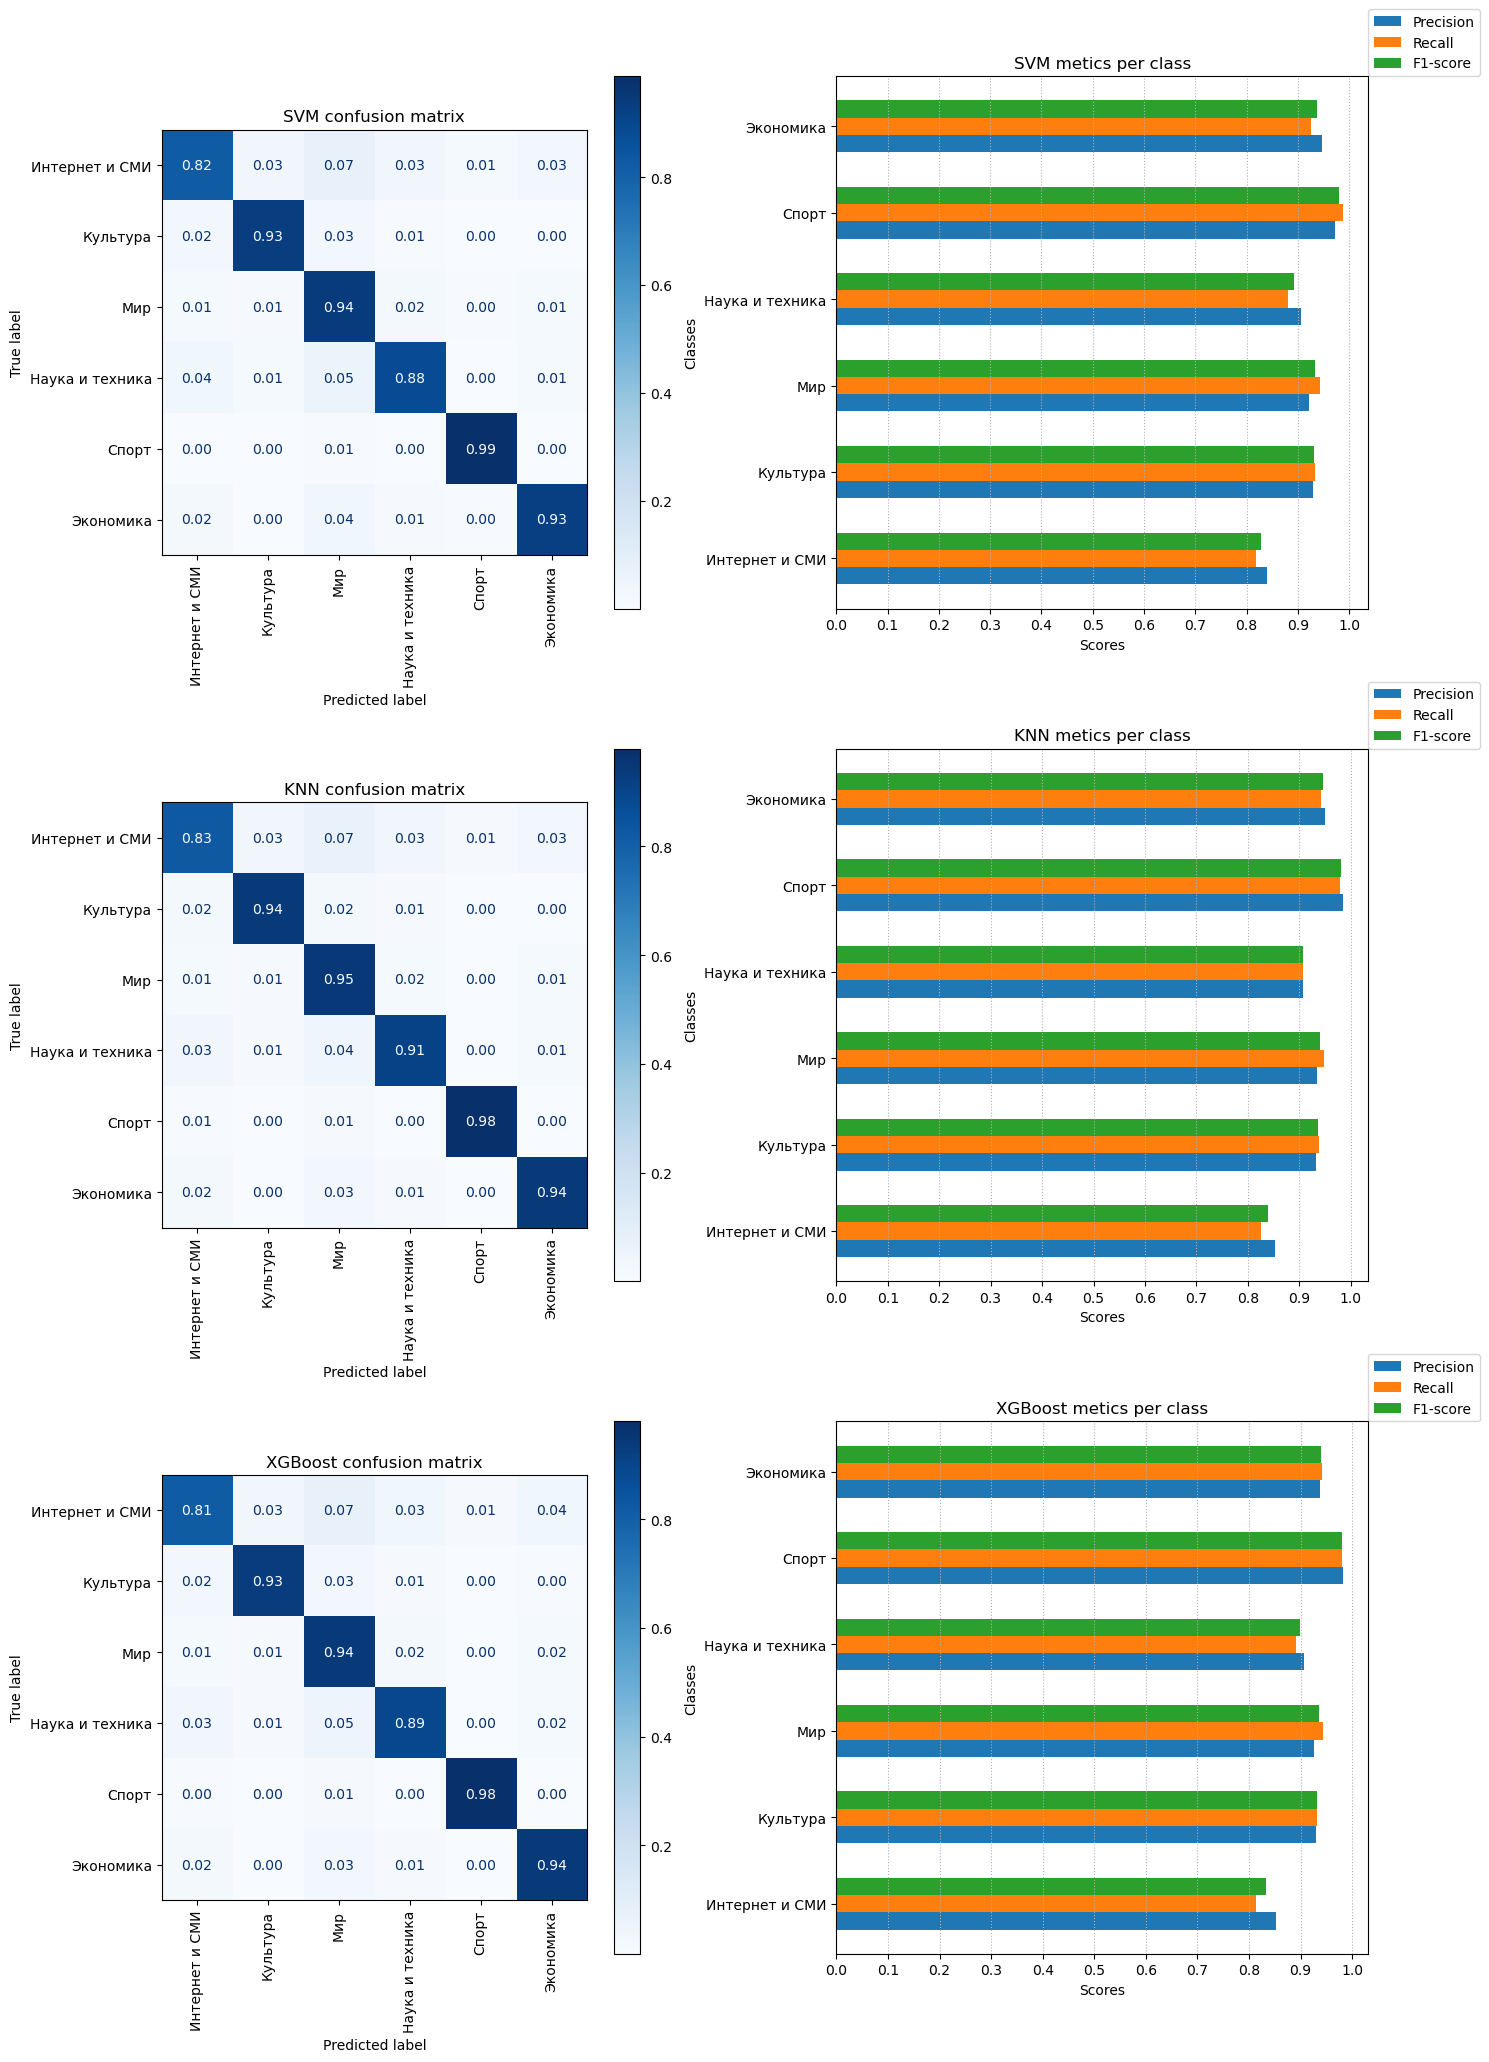

In [74]:
y_preds = {'SVM':svm_pred,
           'KNN':knn_pred,
           'XGBoost': xgb_pred}

plot_results(y_preds)

# word2vec & tf-idf <a id='wvidf'></a>

In [47]:
# Создание словаря TF-IDF, связывающего слова с их значениями
word2tfidf = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_vectorizer.idf_))

def get_vectorized_text(X, word_vectors=word_vectors, word2tfidf=word2tfidf):
    '''
    Функция для получения векторизованного текста
    '''
    # Инициализация матрицы для хранения векторизованных данных
    vectorized_news = np.zeros((X.shape[0], word_vectors.vector_size), dtype="float32")
    
    # Итерация по всем новостям с отображением прогресса
    for i in tqdm(range(X.shape[0])):
        # Получение слов из текущей новости, которые присутствуют в предобученных векторах и имеют значения TF-IDF
        words = [word for word in X.text.iloc[i].split()
                 if word in word_vectors and word in word2tfidf]
        
        # Получение векторов слов из предобученных векторов для каждого слова в текущей новости
        word_vecs = [word_vectors[word] for word in words]
        
        # Получение значений TF-IDF для каждого слова в текущей новости
        word_idfs = [word2tfidf[word] for word in words]
        
        # Создание вектора для текущей новости путем усреднения векторов слов с использованием значений TF-IDF в качестве весов
        vectorized_news[i, :] = np.average(word_vecs, axis=0, weights=word_idfs)

    return vectorized_news

# Применяем функцию к столбцу 'text' в X_train, создавая новый столбец 'vectorized_text'
X_train_w2v_idf = pd.DataFrame(get_vectorized_text(X_train, word_vectors, word2tfidf))

# Применяем функцию к столбцу 'text' в X_test, создавая новый столбец 'vectorized_text'
X_test_w2v_idf = pd.DataFrame(get_vectorized_text(X_test word_vectors, word2tfidf))


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 129648/129648 [00:59<00:00, 2177.03it/s]


In [48]:
X_train_w2_idf.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.257951,0.163936,-0.035725,-0.006402,0.275154,-0.035418,-0.045603,0.023067,0.316788,0.042518,...,-0.225543,-0.087458,0.035455,-0.016342,0.160120,0.002019,0.123171,-0.038014,-0.059306,-0.044289
1,-0.300109,0.004293,-0.035825,-0.041974,-0.082057,-0.184046,0.113368,0.160556,0.061072,0.098960,...,0.192601,-0.098810,-0.134614,-0.133137,-0.052199,0.029421,-0.067310,-0.173774,-0.092292,0.069684
2,-0.091480,-0.141013,-0.016872,-0.011953,-0.136631,-0.162130,0.161069,0.261651,0.126938,0.047057,...,-0.090520,-0.105111,-0.238326,0.186683,-0.003963,-0.091956,0.132584,-0.179645,-0.267016,0.328094
3,-0.251188,-0.059538,-0.089866,-0.051826,0.191686,-0.351030,-0.161590,0.207199,-0.101902,0.104740,...,-0.101296,0.046473,0.170572,-0.084869,-0.099373,-0.250242,0.097432,0.132503,-0.065724,-0.203094
4,-0.133672,0.104798,0.019673,0.126827,-0.064540,0.086783,-0.013948,-0.034879,-0.022462,0.100571,...,-0.140996,0.043586,-0.005042,0.160985,0.090308,-0.100363,0.033904,-0.005952,-0.040293,-0.116155


In [49]:
X_train_w2_idf.shape

(302510, 300)

### SVM <a id='wvidf_svm'></a>

In [51]:
%%time
svm_pred = evaluate_model(svm_model, x_train=X_train_w2v_idf, x_test=X_test_w2v_idf)

Weighted Precision: 0.9206037507149016
Weighted Recall: 0.9208472170800938
Weighted F1 score: 0.9205802691369984
CPU times: user 12.1 s, sys: 480 ms, total: 12.6 s
Wall time: 12.9 s


### KNN <a id='wvidf_knn'></a>

In [54]:
knn_model = KNeighborsClassifier(n_neighbors=7, n_jobs=8)

In [55]:
%%time
knn_pred = evaluate_model(knn_model, x_train=X_train_w2v_idf, x_test=X_test_w2v_idf)

Weighted Precision: 0.9305959885147975
Weighted Recall: 0.9307818092064667
Weighted F1 score: 0.9306320983897995
CPU times: user 24min 15s, sys: 12.1 s, total: 24min 27s
Wall time: 4min 6s


### XGBoost <a id='wvidf_xgb'></a>

In [59]:
import xgboost as xgb

In [62]:
%%time
xgb_model = xgb.XGBClassifier(objective='multi:softmax',eval_metric='mlogloss', verbosity=2,
                              num_class=6, max_depth=7, subsample=0.5, learning_rate=0.1,
                              n_estimators=125)
xgb_pred = evaluate_model(xgb_model, x_train=X_train_w2v_idf, x_test=X_test_w2v_idf)


Weighted Precision: 0.9218016891426112
Weighted Recall: 0.9221738862149821
Weighted F1 score: 0.921865173031399
CPU times: user 15min 56s, sys: 1min 28s, total: 17min 25s
Wall time: 2min 39s


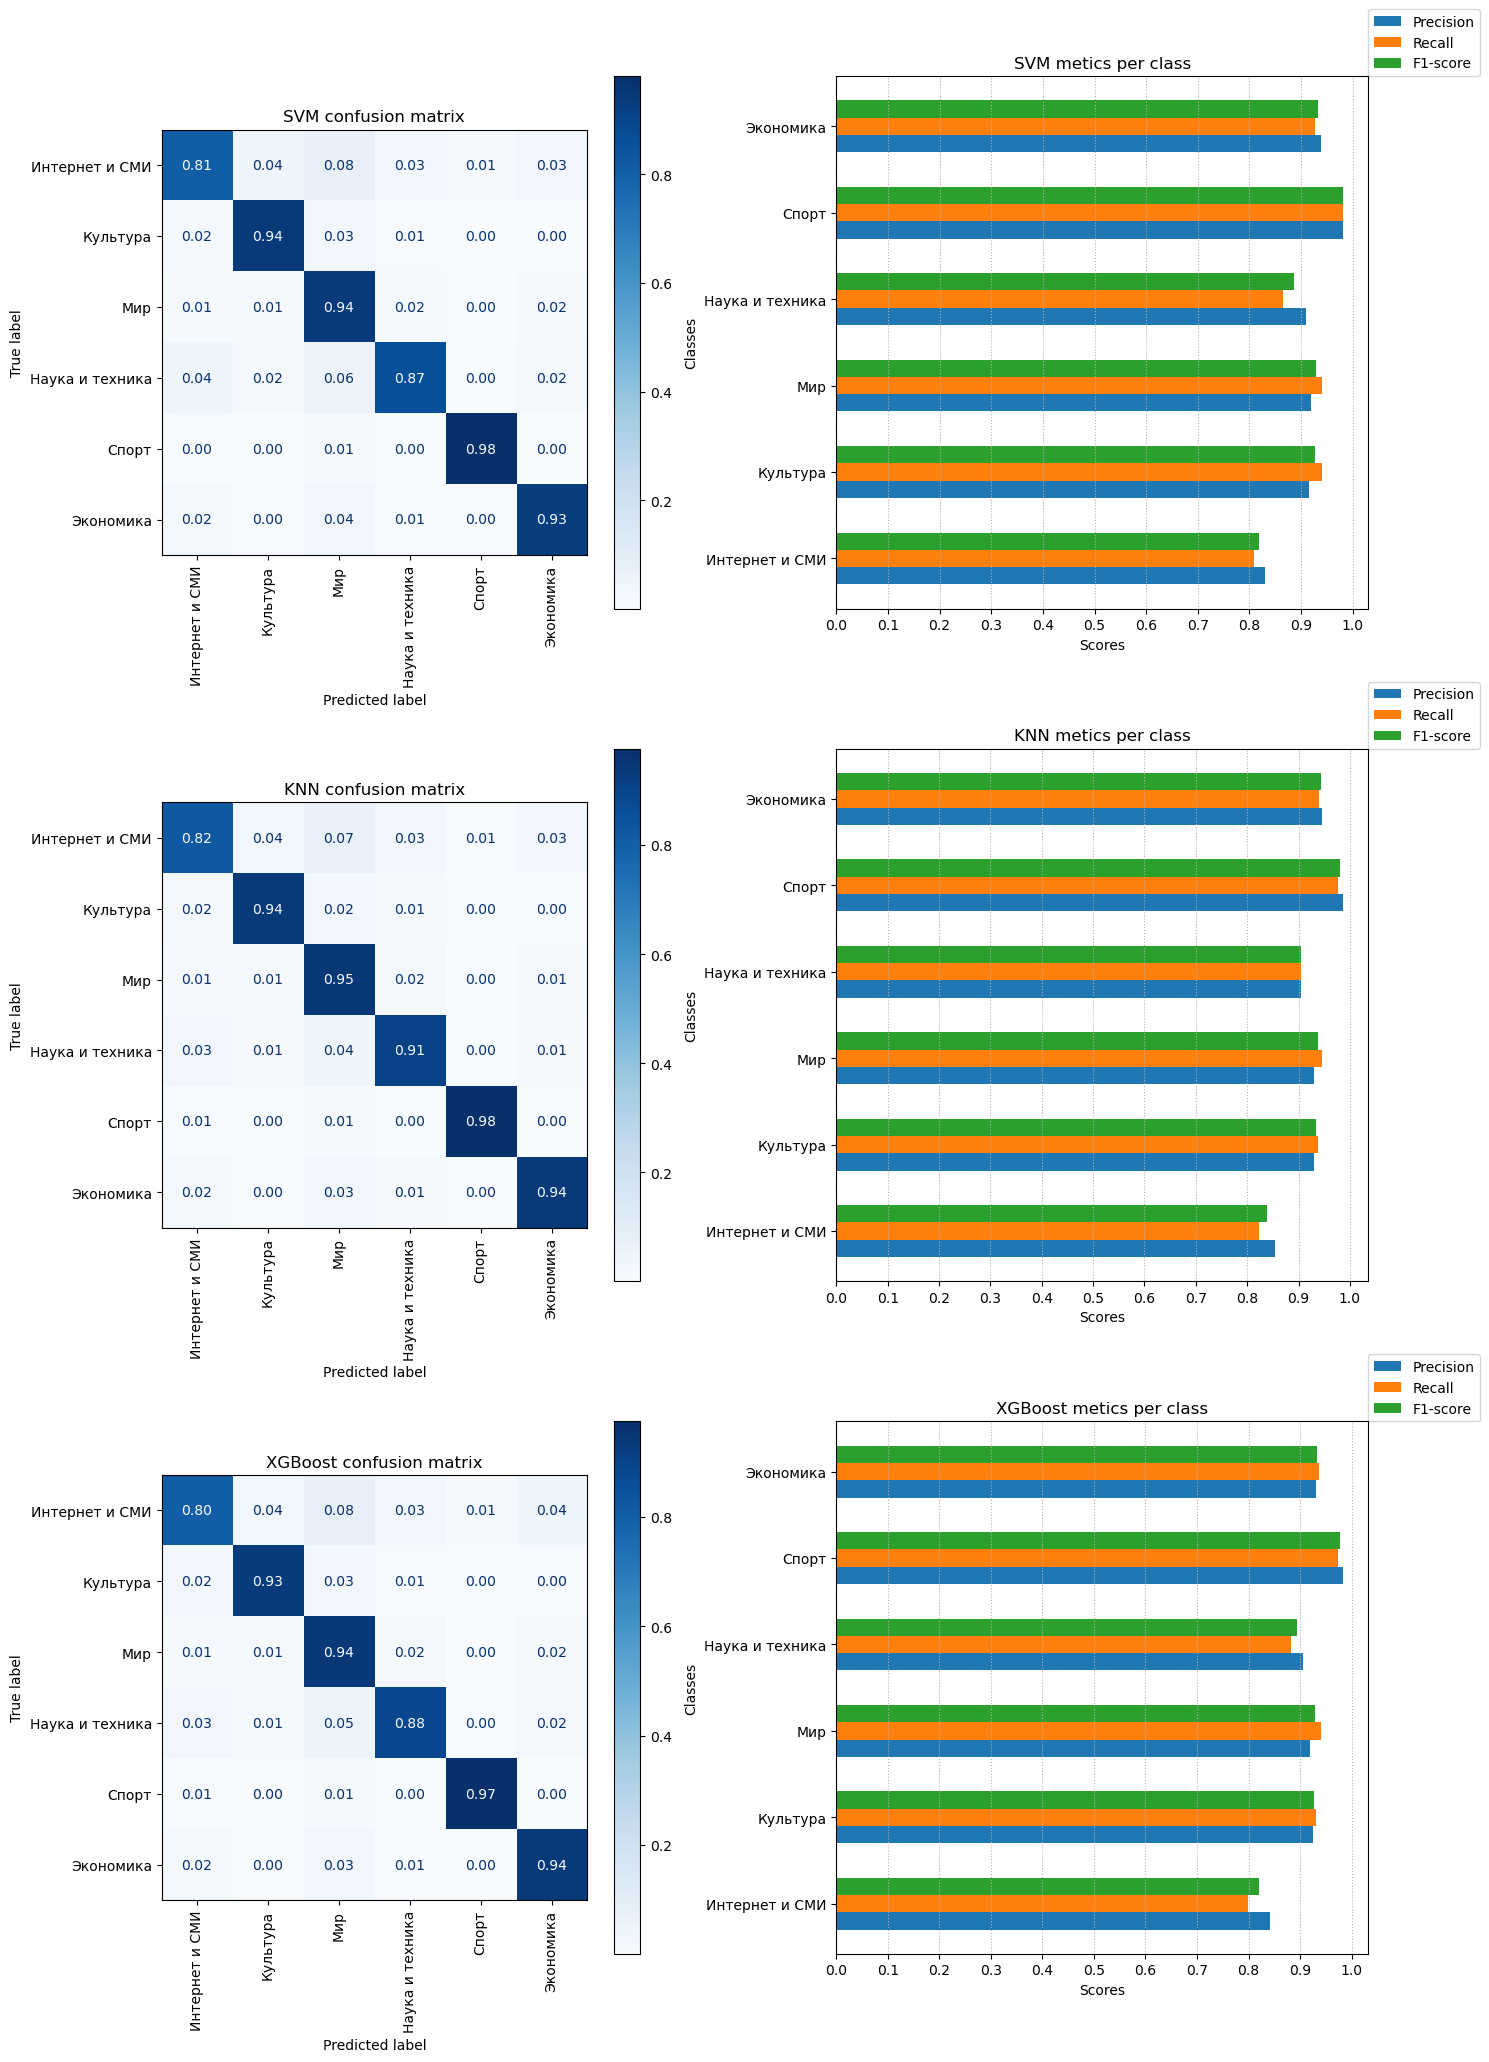

In [65]:
y_preds = {'SVM':svm_pred,
           'KNN':knn_pred,
           'XGBoost': xgb_pred}

plot_results(y_preds)

# NewsClassifier <a id='news_clf'></a>

In [1]:
import re

# Импорт библиотек для анализа данных и визуализации
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Импорт библиотек для обработки текста и работы с естественным языком
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import defaultdict
from pymystem3 import Mystem  # Подгружаем Mystem из библиотеки pymystem3
from tqdm import tqdm  # Импортируем tqdm для отслеживания прогресса
from stop_words import get_stop_words
from functools import lru_cache  # Декоратор lru_cache используется для кэширования результатов вызова функции
tqdm.pandas()  # Инициализация tqdm для отслеживания прогресса выполнения операций

# Импорт библиотек для машинного обучения
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import f1_score, precision_score, recall_score

# Импорт библиотек для обработки XML
import xml.etree.ElementTree as ET

# Конфигурация логгера
import logging

# Пользовательский трансформатор для предобработки текста
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Загрузка ресурсов NLTK
        self.mystem = None
        self.STOP_WORDS = None
        logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

    def fit(self, X, y=None):
        """
        Инициализация Mystem для лемматизации и загрузка стоп-слов для английского и русского языков.
        """
        # Инициализация Mystem для лемматизации
        self.mystem = Mystem()
        
        # Загрузка стоп-слов для английского и русского языков
        nltk.download('stopwords')

        # Комбинирование стоп-слов из различных источников
        en_stop_words = set(get_stop_words('en')) | set(stopwords.words('english'))
        ru_stop_words = set(get_stop_words('ru')) | set(stopwords.words('russian'))
        common_stop_words = {'также', 'новость', 'новости', ...}  # Длинный список общих стоп-слов
        
        # Комбинирование всех стоп-слов
        self.STOP_WORDS = en_stop_words | ru_stop_words | common_stop_words
        
        return self

    def transform(self, X):
        """
        Создание копии входных данных и применение предобработки текста с использованием заданного пайплайна.
        """
        # Создание копии входных данных
        X_copy = X.copy()
        
        # Предобработка текста с использованием заданного пайплайна
        return self._preprocess_text(X_copy)

    def _preprocess_text(self, X):
        '''
        Применение пайплайна обработки текста к столбцам 'text' и 'title' во входных данных.
        '''
        # Пайплайн для обработки текста
        TEXT_PIPELINE = Pipeline([
            ('delete_xml', FunctionTransformer(func=lambda x: x.progress_apply(self.del_xml), validate=False)),
            ('lowercase', FunctionTransformer(func=lambda x: x.progress_apply(self.get_lower), validate=False)),
            ('remove_punctuation', FunctionTransformer(func=lambda x: x.progress_apply(self.remove_punctuation), validate=False)),
            ('lemmatize', FunctionTransformer(func=lambda x: x.progress_apply(self.lemmatize_words), validate=False)),
        ])  
        
        # Пайплайн для обработки заголовка
        TITLE_PIPELINE = Pipeline([
            ('lowercase', FunctionTransformer(func=lambda x: x.progress_apply(self.get_lower), validate=False)),
            ('remove_punctuation', FunctionTransformer(func=lambda x: x.progress_apply(self.remove_punctuation), validate=False)),
            ('lemmatize', FunctionTransformer(func=lambda x: x.progress_apply(self.lemmatize_words), validate=False)),
        ])  
        
        # Применение пайплайна обработки текста к столбцу 'text'
        logging.info('Предобработка текста')
        text = TEXT_PIPELINE.fit_transform(X['text'])
        
        # Применение пайплайна обработки текста к столбцу 'title'
        logging.info('Предобработка заголовка')
        title = TITLE_PIPELINE.fit_transform(X['title'])
        
        # Комбинирование обработанных столбцов 'title' и 'text'
        return pd.DataFrame(title + ' ' + text, columns=['text'])
        
    def del_xml(self, text):
        """
        Парсинг XML текста.
        """
        text = re.sub(r'[\x00-\x08\x0B-\x0C\x0E-\x1F]', '', text)
    
        # Разбор XML-текста
        root = ET.fromstring(text)
    
        # Извлечение текста из тега "person"
        return root.find('person').text if root.find('person') is not None else text
    
    def get_lower(self, text):
        """
        Преобразование текста в нижний регистр.
        """
        return str(text).lower()

    def remove_punctuation(self, text):
        """
        Удаление неалфавитных символов с сохранением дефисов и апострофов.
        """
        return ''.join([c if c.isalpha() or c in ['-', "'"] else ' ' for c in text])
    
    @lru_cache(maxsize=None)
    def get_word_normal_form(self, word):
        """
        Получение нормальной формы слова с использованием Mystem.
        """
        return ''.join(self.mystem.lemmatize(word)).strip().replace('ё', 'е').strip('-')
        
    def lemmatize_words(self, text):
        """
        Лемматизация слов в заданном тексте и фильтрация стоп-слов.
        """
        return ' '.join([self.get_word_normal_form(word) for word in text.split() if len(
            self.get_word_normal_form(word)) > 2 and self.get_word_normal_form(word) not in self.STOP_WORDS])

# Трансформатор для векторизации текста
class TextVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Инициализация модели TF-IDF
        self.tfidf_model = TfidfVectorizer(min_df=3, ngram_range=(1, 2), lowercase=False)
        self.word_vectors = None  # Векторы слов
        self.word2tfidf = None  # Соответствие слов TF-IDF значениям
        self.vec_size = 300  # Размер вектора слов
        logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

    def fit(self, X, y=None):
        """
        Обучение модели TF-IDF и Word2Vec на входных данных.
        """
        logging.info('Обучение модели TF-IDF')

        # Обучение TF-IDF модели на тексте новостей
        self.tfidf_model.fit(X.text)
        
        # Подготовка текста для обучения Word2Vec
        sentences = [text.split() for text in X['text']]
        logging.info('Обучение модели Word2Vec')

        # Обучение модели Word2Vec на подготовленных данных
        self.word_vectors = Word2Vec(sentences=sentences, min_count=3, vector_size=self.vec_size, window=3,
                                     hs=1, sg=0, negative=0, workers=8, epochs=8).wv
        
        # Создание соответствия слов TF-IDF значениям
        self.word2tfidf = dict(zip(self.tfidf_model.get_feature_names_out(), self.tfidf_model.idf_))

        return self
        
    def transform(self, X):
        """
        Векторизация текста с использованием TF-IDF и Word2Vec.
        """
        logging.info('Векторизация текста с использованием TF-IDF и Word2Vec')

        # Создание массива нулей для хранения векторизованных новостей
        vectorized_news = np.zeros((X.shape[0], self.word_vectors.vector_size), dtype="float32")
        # Итерация по каждой новости в наборе данных
        for i in tqdm(range(X.shape[0])):
            # Разбиение текста новости на слова и фильтрация, оставляя только те, которые есть в word_vectors и word2tfidf
            words = [word for word in X.text.iloc[i].split() if word in self.word_vectors and word in self.word2tfidf]

            # Получение векторов слов и их значений TF-IDF
            word_vecs = [self.word_vectors[word] for word in words]
            word_idfs = [self.word2tfidf[word] for word in words]
            
            # Усреднение векторов слов, применяя веса TF-IDF, и сохранение результата в массив vectorized_news
            vectorized_news[i,:] = np.average(word_vecs, axis=0, weights=word_idfs)

        return pd.DataFrame(vectorized_news)

# Классификатор новостей с использованием метода k-ближайших соседей
class NewsClassifier(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Инициализация модели k-ближайших соседей
        self.knn_model = KNeighborsClassifier(n_neighbors=7, n_jobs=8)
        self.label_encoder = LabelEncoder()  # Инициализация энкодера для меток классов
        logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    
    def fit(self, X, y):
        """
        Обучение модели k-ближайших соседей на входных данных.
        """
        logging.info('Кодирование меток классов')

        # Преобразование строковых меток в числовой формат
        y = self.label_encoder.fit_transform(y)
        logging.info('Обучение модели k-ближайших соседей')

        # Обучение модели k-ближайших соседей
        self.knn_model.fit(X, y)

        return self

    def predict(self, X):
        """
        Прогнозирование меток классов для входных данных.
        """
        # Прогнозирование меток классов с использованием обученной модели k-ближайших соседей
        logging.info('Прогнозирование с использованием модели k-ближайших соседей')
        y_pred = self.knn_model.predict(X.values)
        
        # Преобразование числовых меток обратно в строковый формат
        return self.label_encoder.inverse_transform(y_pred)


In [2]:
# Создание конвейера для классификации новостей
news_classifier_pipe = Pipeline([
    ('TextPreprocessor', TextPreprocessor()),  # Препроцессинг текста
    ('TextVectorizer', TextVectorizer()),  # Векторизация текста
    ('NewsClassifier', NewsClassifier())  # Классификация новостей
])

In [3]:
import pickle

# Сохранение конвейера в файл с использованием pickle
with open('news_classifier_pipe.pkl', 'wb') as file:
    pickle.dump(news_classifier_pipe, file, protocol=pickle.HIGHEST_PROTOCOL)

## Конечные результаты классификатора

In [4]:
%%time

# Загрузка конвейера из файла с использованием pickle
with open('news_classifier_pipe.pkl', 'rb') as file:
    news_classifier_pipe = pickle.load(file)

# Загрузка тестовых данных из файла 'test.csv'
df = pd.read_csv('test.csv')

# Выбор признаков ('title' и 'text') и целевой переменной ('topic')
X = df[['title', 'text']]
y = df['topic'] # Целевая переменная

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Обучение конвейера на обучающем наборе данных
news_classifier_pipe.fit(X_train, y_train)

# Прогнозирование меток классов на тестовом наборе данных
y_pred = news_classifier_pipe.predict(X_test)

# Вывод метрик производительности
print('Weighted Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Weighted Recall:', recall_score(y_test, y_pred, average='weighted'))
print('Weighted F1 score:', f1_score(y_test, y_pred, average='weighted'))

[nltk_data] Downloading package stopwords to /Users/bulat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2024-03-08 17:24:06,645 : INFO : Предобработка текста
100%|█████████████████████████████████| 302510/302510 [01:06<00:00, 4561.76it/s]
2024-03-08 17:25:42,819 : INFO : Предобработка заголовка
100%|███████████████████████████████| 302510/302510 [00:02<00:00, 141513.08it/s]
2024-03-08 17:25:50,555 : INFO : Обучение модели TF-IDF
2024-03-08 17:27:10,110 : INFO : Обучение модели Word2Vec
2024-03-08 17:27:10,119 : INFO : collecting all words and their counts
2024-03-08 17:27:10,120 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-03-08 17:27:10,380 : INFO : PROGRESS: at sentence #10000, processed 1235532 words, keeping 64633 word types
2024-03-08 17:27:10,663 : INFO : PROGRESS: at sentence #20000, processed 2466131 words, keeping 93465 word types
2024-03-08 17:27:10,919 : INFO : PROGRESS: at sentence #30000, processed 3692023 words, kee

Weighted Precision: 0.9274907130806471
Weighted Recall: 0.9276656793780081
Weighted F1 score: 0.9274850412376191
CPU times: user 49min 38s, sys: 2min 2s, total: 51min 40s
Wall time: 14min 48s
